In [3]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram

# Basic Idea.
For every pair of cells that should not be equal, $wrk$ qbit can be 1 only when the pair of cells are not equal.

## Sudoku $2 \times 2$
Only one bit for each cell. The circuit for each pair is simple.

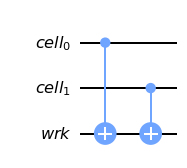

In [24]:
cell=QuantumRegister(2,name='cell')
wrk=QuantumRegister(1,name='wrk')
qc = QuantumCircuit(cell,wrk)
qc.cx(cell,wrk)
qc.draw('mpl')

## Sudoku $4 \times 4$
Each cell has 2 qbits. A pair of cells are not equal even if they are not equal at one position. OR gate is required to implement this. The CX and MCT gates are used to implement it.

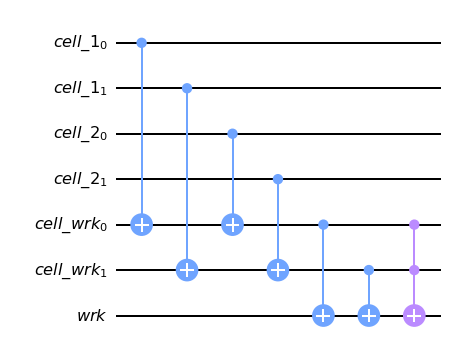

In [23]:
cell_1=QuantumRegister(2,name='cell_1')
cell_2=QuantumRegister(2,name='cell_2')
cell_wrk=QuantumRegister(2,name='cell_wrk')
wrk=QuantumRegister(1,name='wrk')
out=QuantumRegister(1,name='out')
qc = QuantumCircuit(cell_1,cell_2,cell_wrk,wrk)
qc.cx(cell_1,cell_wrk)
qc.cx(cell_2,cell_wrk)
qc.cx(cell_wrk,wrk)
qc.mct(cell_wrk,wrk)
qc.draw('mpl')

## Merging
All the pairs in consideration generate a $wrk$ qbit. An eigenstate is a solution only if all the $wrk$ qbits are in 1 state. All the $wrk$ qbits are AND'ed using a MCT gate. The $wrk$ qbits can be reset by using the above circuit again for each pair.

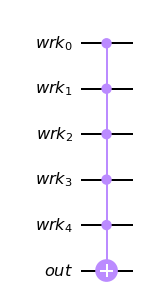

In [21]:
wrk=QuantumRegister(5,name='wrk')
out=QuantumRegister(1,name='out')
qc = QuantumCircuit(wrk,out)
qc.mct(wrk,out)
qc.draw('mpl')